# Importing necessary packages

In [1]:
import git
import shutil
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
saved_imgs_dir = 'augmented_imgs'

In [3]:
photo_dist_dir = 'photometric'

In [4]:
geo_dist_dir = 'geometric'

In [5]:
for img in os.listdir(saved_imgs_dir+'/'+photo_dist_dir):
    os.remove(saved_imgs_dir+'/'+photo_dist_dir+'/'+img)

In [6]:
for img in os.listdir(saved_imgs_dir+'/'+geo_dist_dir):
    os.remove(saved_imgs_dir+'/'+geo_dist_dir+'/'+img)

# Accessing COTS Dataset

## Cloning the dataset from GitHub to local storage

In [7]:
# Packages Install
!pip install gitpython

# Cloning repository
repo_url = 'https://github.com/dylanseychell/COTSDataset.git'
repo_dir = 'COTSDataset'  # Directory to clone the repository into

# Checking if the repository directory already exists
if not os.path.exists(repo_dir):
    # Cloning repository
    git.Repo.clone_from(repo_url, repo_dir)
    print("Repository cloned successfully.")
else:
    print("Repository already cloned.")

# Defining paths
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")

print("Repository cloned successfully.")

Repository already cloned.
Repository cloned successfully.


In [8]:
os.listdir('COTSDataset')

['.DS_Store',
 '.git',
 'LICENSE',
 'Part 1 - Single Objects',
 'Part 2 - Multiple Objects',
 'Part 3 - Complex Background',
 'Pointer Data',
 'README.md',
 'Videos']

## Get a random 5 images from the dataset

In [9]:
single_obj_path = repo_dir+'/Part 1 - Single Objects'
mult_obj_path = repo_dir+'/Part 2 - Multiple Objects'
complex_bg_path = repo_dir+'/Part 3 - Complex Background'

In [10]:
def get_images_from_folder(main_path):
    imgs_list = []
    for sub_path in os.listdir(main_path):
        sub_list = []
        for file in os.listdir(main_path+"/"+sub_path):
            if file.endswith(".jpeg") or file.endswith(".png"):
                sub_list.append(main_path+"/"+sub_path+"/"+file)
        imgs_list.append(sub_list)

    return imgs_list

In [11]:
single_obj_imgs = get_images_from_folder(single_obj_path)

single_obj_imgs

[['COTSDataset/Part 1 - Single Objects/objects/beer_mug_colour.jpeg',
  'COTSDataset/Part 1 - Single Objects/objects/beer_mug_depth16.png',
  'COTSDataset/Part 1 - Single Objects/objects/beer_mug_depth8.png',
  'COTSDataset/Part 1 - Single Objects/objects/beer_mug_depth8_nofill.png',
  'COTSDataset/Part 1 - Single Objects/objects/boots_colour.jpeg',
  'COTSDataset/Part 1 - Single Objects/objects/boots_depth16.png',
  'COTSDataset/Part 1 - Single Objects/objects/boots_depth8.png',
  'COTSDataset/Part 1 - Single Objects/objects/boots_depth8_nofill.png',
  'COTSDataset/Part 1 - Single Objects/objects/bosnia_colour.jpeg',
  'COTSDataset/Part 1 - Single Objects/objects/bosnia_depth16.png',
  'COTSDataset/Part 1 - Single Objects/objects/bosnia_depth8.png',
  'COTSDataset/Part 1 - Single Objects/objects/bosnia_depth8_nofill.png',
  'COTSDataset/Part 1 - Single Objects/objects/bowl_colour.jpeg',
  'COTSDataset/Part 1 - Single Objects/objects/bowl_depth16.png',
  'COTSDataset/Part 1 - Single Ob

In [12]:
mult_obj_imgs = get_images_from_folder(mult_obj_path)

mult_obj_imgs

[['COTSDataset/Part 2 - Multiple Objects/academic_book_no/1_colour.jpeg',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/1_depth16.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/1_depth8.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/1_depth8_nofill.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/2_colour.jpeg',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/2_depth16.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/2_depth8.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/2_depth8_nofill.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/3_colour.jpeg',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/3_depth16.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/3_depth8.png',
  'COTSDataset/Part 2 - Multiple Objects/academic_book_no/3_depth8_nofill.png'],
 ['COTSDataset/Part 2 - Multiple Objects/academic_book_oc/1_colour.jpeg',
  'COTSDataset/Part 2 

In [13]:
complex_bg_imgs = get_images_from_folder(complex_bg_path)

complex_bg_imgs

[['COTSDataset/Part 3 - Complex Background/booksA_nw_no/1_colour.jpeg',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/1_depth16.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/1_depth8.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/1_depth8_nofill.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/2_colour.jpeg',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/2_depth16.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/2_depth8.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/2_depth8_nofill.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/3_colour.jpeg',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/3_depth16.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/3_depth8.png',
  'COTSDataset/Part 3 - Complex Background/booksA_nw_no/3_depth8_nofill.png'],
 ['COTSDataset/Part 3 - Complex Background/booksA_nw_oc/1_colour.jpeg',
  'COTSDataset/Part 3 - Complex Background/books

In [14]:
img_main_list = [single_obj_imgs, mult_obj_imgs, complex_bg_imgs]

In [15]:
imgs_selected_list = []
list_len = 0
while list_len < 5:
    index = random.randrange(len(img_main_list))
    img_list_selected = random.choice(img_main_list[index])
    rand_index = random.randrange(len(img_list_selected))
    img_selected = img_list_selected[rand_index]
    if "empty_" not in img_selected and "nofill" not in img_selected:
        imgs_selected_list.append(img_selected)
        list_len += 1

imgs_selected_list

['COTSDataset/Part 3 - Complex Background/booksA_nw_no/3_colour.jpeg',
 'COTSDataset/Part 3 - Complex Background/cupsA_nw_no/3_colour.jpeg',
 'COTSDataset/Part 2 - Multiple Objects/mugs_oc/2_colour.jpeg',
 'COTSDataset/Part 3 - Complex Background/souvenirsB_nw_no/1_depth8.png',
 'COTSDataset/Part 1 - Single Objects/objects/beer_mug_colour.jpeg']

In [16]:
img_selected = cv2.imread(random.choice(imgs_selected_list))

In [17]:
height, width = img_selected.shape[:2]
center = (width / 2, height / 2)
center

(640.0, 360.0)

# 1. Photometric Distortions

In [18]:
def adjust_image_contrast(img, contrast_val):
    new_img = cv2.convertScaleAbs(img, alpha=contrast_val, beta=0)
    return new_img

In [19]:
def adjust_image_brightness(img, bright_val):
    new_img = cv2.convertScaleAbs(img, alpha=1.0, beta=bright_val)
    return new_img

In [20]:
def adjust_image_saturation(img, sat_factor):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * sat_factor
    saturated_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
    return saturated_img

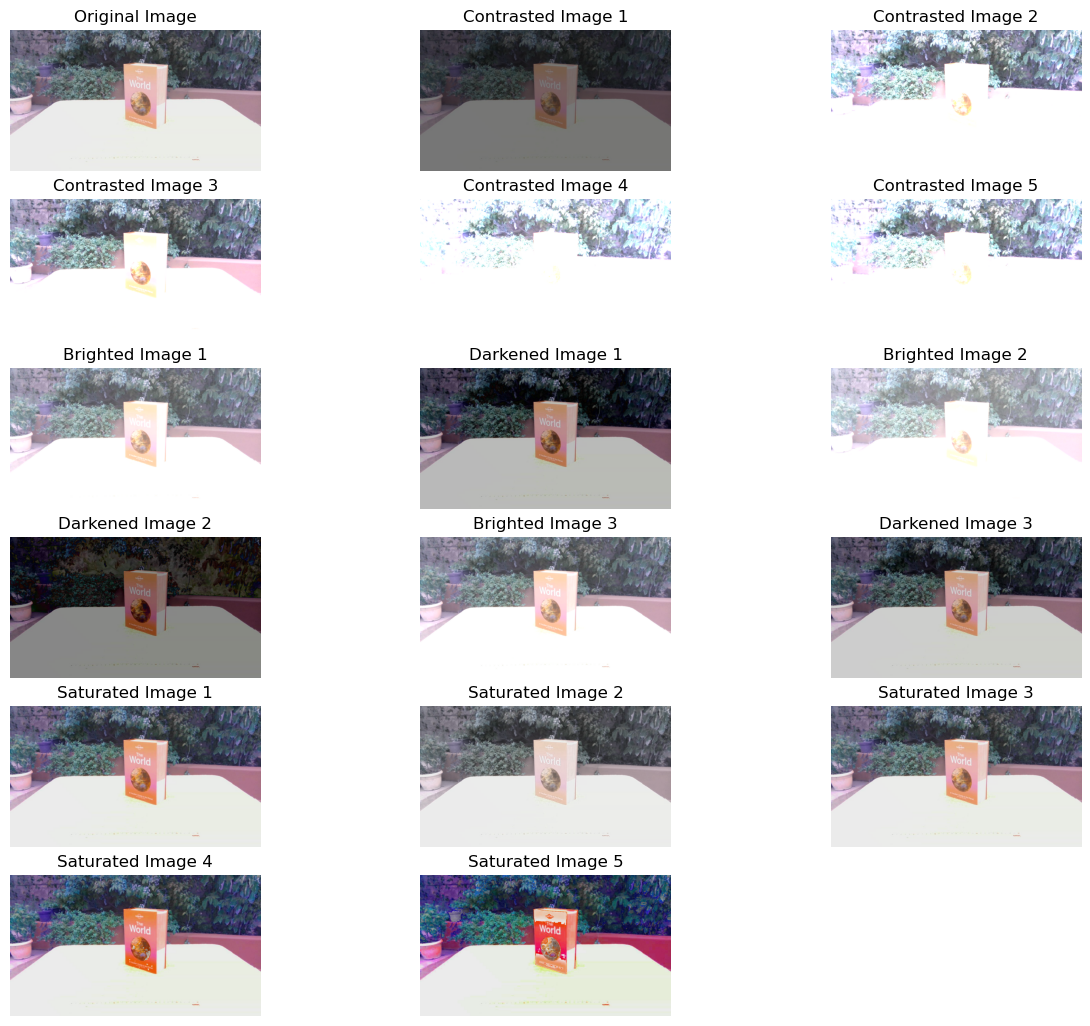

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15), squeeze=False)
gs = axes[0,0].get_gridspec()

current_image = cv2.imread(imgs_selected_list[0])
plt_size = gs.ncols * gs.nrows

cont_selected_1 = adjust_image_contrast(current_image, 0.5)
cont_selected_2 = adjust_image_contrast(current_image, 2.0)
cont_selected_3 = adjust_image_contrast(current_image, 1.5)
cont_selected_4 = adjust_image_contrast(current_image, 3.0)
cont_selected_5 = adjust_image_contrast(current_image, 2.5)
bright_selected_1 = adjust_image_brightness(current_image, 50)
dark_selected_1 = adjust_image_brightness(current_image, -50)
bright_selected_2 = adjust_image_brightness(current_image, 100)
dark_selected_2 = adjust_image_brightness(current_image, -100)
bright_selected_3 = adjust_image_brightness(current_image, 30)
dark_selected_3 = adjust_image_brightness(current_image, -30)
sat_selected_1 = adjust_image_saturation(current_image, 1.5)
sat_selected_2 = adjust_image_saturation(current_image, 0.5)
sat_selected_3 = adjust_image_saturation(current_image, 1.2)
sat_selected_4 = adjust_image_saturation(current_image, 2.1)
sat_selected_5 = adjust_image_saturation(current_image, 3.5)

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': cont_selected_1,  'title': 'Contrasted Image 1'},
              {'generated_image': cont_selected_2,  'title': 'Contrasted Image 2'},
              {'generated_image': cont_selected_3,  'title': 'Contrasted Image 3'},
              {'generated_image': cont_selected_4,  'title': 'Contrasted Image 4'},
              {'generated_image': cont_selected_5,  'title': 'Contrasted Image 5'},
              {'generated_image': bright_selected_1, 'title': 'Brighted Image 1'},
              {'generated_image': dark_selected_1, 'title': 'Darkened Image 1'},
              {'generated_image': bright_selected_2, 'title': 'Brighted Image 2'},
              {'generated_image': dark_selected_2, 'title': 'Darkened Image 2'},
              {'generated_image': bright_selected_3, 'title': 'Brighted Image 3'},
              {'generated_image': dark_selected_3, 'title': 'Darkened Image 3'},
              {'generated_image': sat_selected_1, 'title': 'Saturated Image 1'},
              {'generated_image': sat_selected_2, 'title': 'Saturated Image 2'},
              {'generated_image': sat_selected_3, 'title': 'Saturated Image 3'},
              {'generated_image': sat_selected_4, 'title': 'Saturated Image 4'},
              {'generated_image': sat_selected_5, 'title': 'Saturated Image 5'}
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[0][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_1_'+str(row)+str(col)+imgs_selected_list[0][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_1_'+str(row)+str(col)+imgs_selected_list[0][-4:], f['generated_image'])

for j in range((5*3)+(1%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

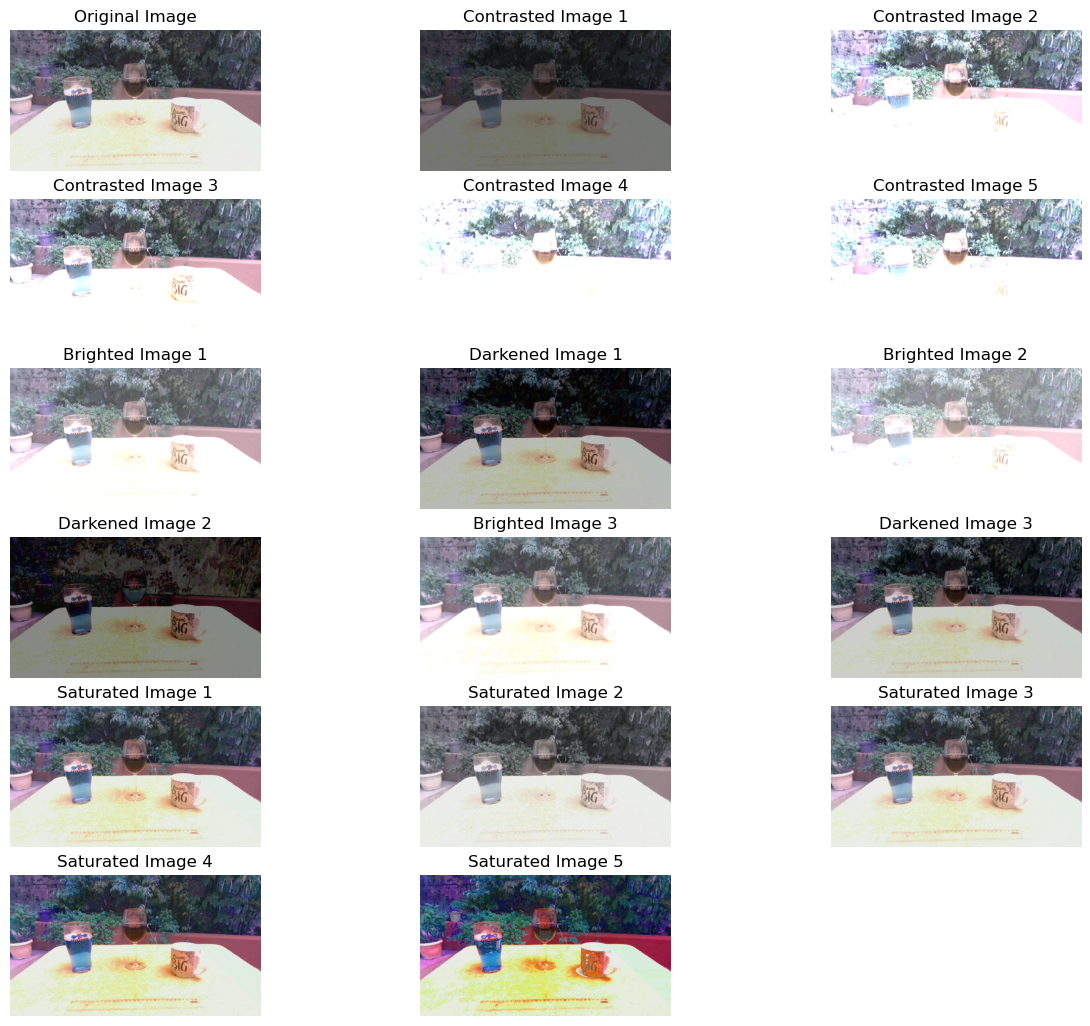

In [22]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15), squeeze=False)
gs = axes[0,0].get_gridspec()

current_image = cv2.imread(imgs_selected_list[1])
plt_size = gs.ncols * gs.nrows

cont_selected_1 = adjust_image_contrast(current_image, 0.5)
cont_selected_2 = adjust_image_contrast(current_image, 2.0)
cont_selected_3 = adjust_image_contrast(current_image, 1.5)
cont_selected_4 = adjust_image_contrast(current_image, 3.0)
cont_selected_5 = adjust_image_contrast(current_image, 2.5)
bright_selected_1 = adjust_image_brightness(current_image, 50)
dark_selected_1 = adjust_image_brightness(current_image, -50)
bright_selected_2 = adjust_image_brightness(current_image, 100)
dark_selected_2 = adjust_image_brightness(current_image, -100)
bright_selected_3 = adjust_image_brightness(current_image, 30)
dark_selected_3 = adjust_image_brightness(current_image, -30)
sat_selected_1 = adjust_image_saturation(current_image, 1.5)
sat_selected_2 = adjust_image_saturation(current_image, 0.5)
sat_selected_3 = adjust_image_saturation(current_image, 1.2)
sat_selected_4 = adjust_image_saturation(current_image, 2.1)
sat_selected_5 = adjust_image_saturation(current_image, 3.5)

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': cont_selected_1,  'title': 'Contrasted Image 1'},
              {'generated_image': cont_selected_2,  'title': 'Contrasted Image 2'},
              {'generated_image': cont_selected_3,  'title': 'Contrasted Image 3'},
              {'generated_image': cont_selected_4,  'title': 'Contrasted Image 4'},
              {'generated_image': cont_selected_5,  'title': 'Contrasted Image 5'},
              {'generated_image': bright_selected_1, 'title': 'Brighted Image 1'},
              {'generated_image': dark_selected_1, 'title': 'Darkened Image 1'},
              {'generated_image': bright_selected_2, 'title': 'Brighted Image 2'},
              {'generated_image': dark_selected_2, 'title': 'Darkened Image 2'},
              {'generated_image': bright_selected_3, 'title': 'Brighted Image 3'},
              {'generated_image': dark_selected_3, 'title': 'Darkened Image 3'},
              {'generated_image': sat_selected_1, 'title': 'Saturated Image 1'},
              {'generated_image': sat_selected_2, 'title': 'Saturated Image 2'},
              {'generated_image': sat_selected_3, 'title': 'Saturated Image 3'},
              {'generated_image': sat_selected_4, 'title': 'Saturated Image 4'},
              {'generated_image': sat_selected_5, 'title': 'Saturated Image 5'}
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[1][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_2_'+str(row)+str(col)+imgs_selected_list[1][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_2_'+str(row)+str(col)+imgs_selected_list[1][-4:], f['generated_image'])

for j in range((5*3)+(1%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

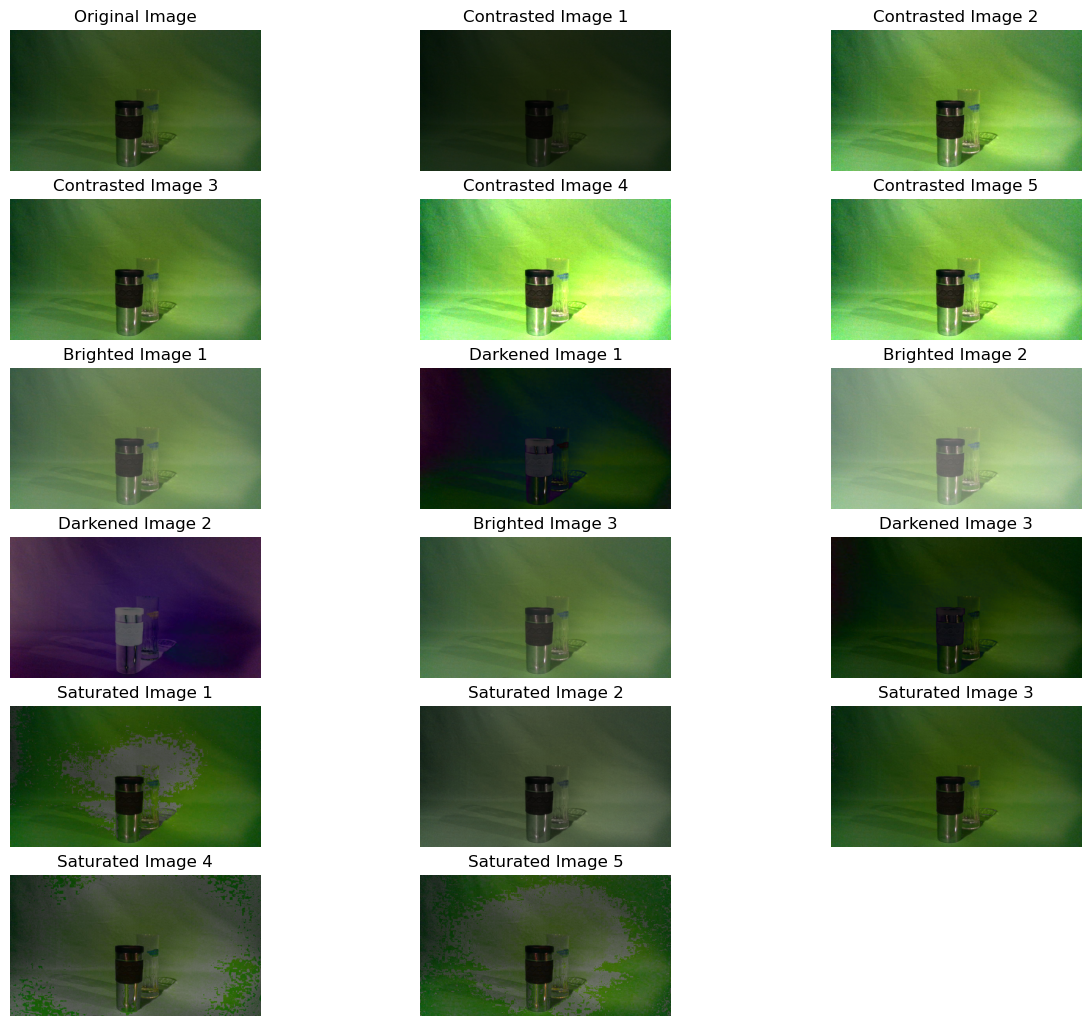

In [23]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15), squeeze=False)
gs = axes[0,0].get_gridspec()

current_image = cv2.imread(imgs_selected_list[2])
plt_size = gs.ncols * gs.nrows

cont_selected_1 = adjust_image_contrast(current_image, 0.5)
cont_selected_2 = adjust_image_contrast(current_image, 2.0)
cont_selected_3 = adjust_image_contrast(current_image, 1.5)
cont_selected_4 = adjust_image_contrast(current_image, 3.0)
cont_selected_5 = adjust_image_contrast(current_image, 2.5)
bright_selected_1 = adjust_image_brightness(current_image, 50)
dark_selected_1 = adjust_image_brightness(current_image, -50)
bright_selected_2 = adjust_image_brightness(current_image, 100)
dark_selected_2 = adjust_image_brightness(current_image, -100)
bright_selected_3 = adjust_image_brightness(current_image, 30)
dark_selected_3 = adjust_image_brightness(current_image, -30)
sat_selected_1 = adjust_image_saturation(current_image, 1.5)
sat_selected_2 = adjust_image_saturation(current_image, 0.5)
sat_selected_3 = adjust_image_saturation(current_image, 1.2)
sat_selected_4 = adjust_image_saturation(current_image, 2.1)
sat_selected_5 = adjust_image_saturation(current_image, 3.5)

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': cont_selected_1,  'title': 'Contrasted Image 1'},
              {'generated_image': cont_selected_2,  'title': 'Contrasted Image 2'},
              {'generated_image': cont_selected_3,  'title': 'Contrasted Image 3'},
              {'generated_image': cont_selected_4,  'title': 'Contrasted Image 4'},
              {'generated_image': cont_selected_5,  'title': 'Contrasted Image 5'},
              {'generated_image': bright_selected_1, 'title': 'Brighted Image 1'},
              {'generated_image': dark_selected_1, 'title': 'Darkened Image 1'},
              {'generated_image': bright_selected_2, 'title': 'Brighted Image 2'},
              {'generated_image': dark_selected_2, 'title': 'Darkened Image 2'},
              {'generated_image': bright_selected_3, 'title': 'Brighted Image 3'},
              {'generated_image': dark_selected_3, 'title': 'Darkened Image 3'},
              {'generated_image': sat_selected_1, 'title': 'Saturated Image 1'},
              {'generated_image': sat_selected_2, 'title': 'Saturated Image 2'},
              {'generated_image': sat_selected_3, 'title': 'Saturated Image 3'},
              {'generated_image': sat_selected_4, 'title': 'Saturated Image 4'},
              {'generated_image': sat_selected_5, 'title': 'Saturated Image 5'}
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[2][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_3_'+str(row)+str(col)+imgs_selected_list[2][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_3_'+str(row)+str(col)+imgs_selected_list[2][-4:], f['generated_image'])

for j in range((5*3)+(1%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

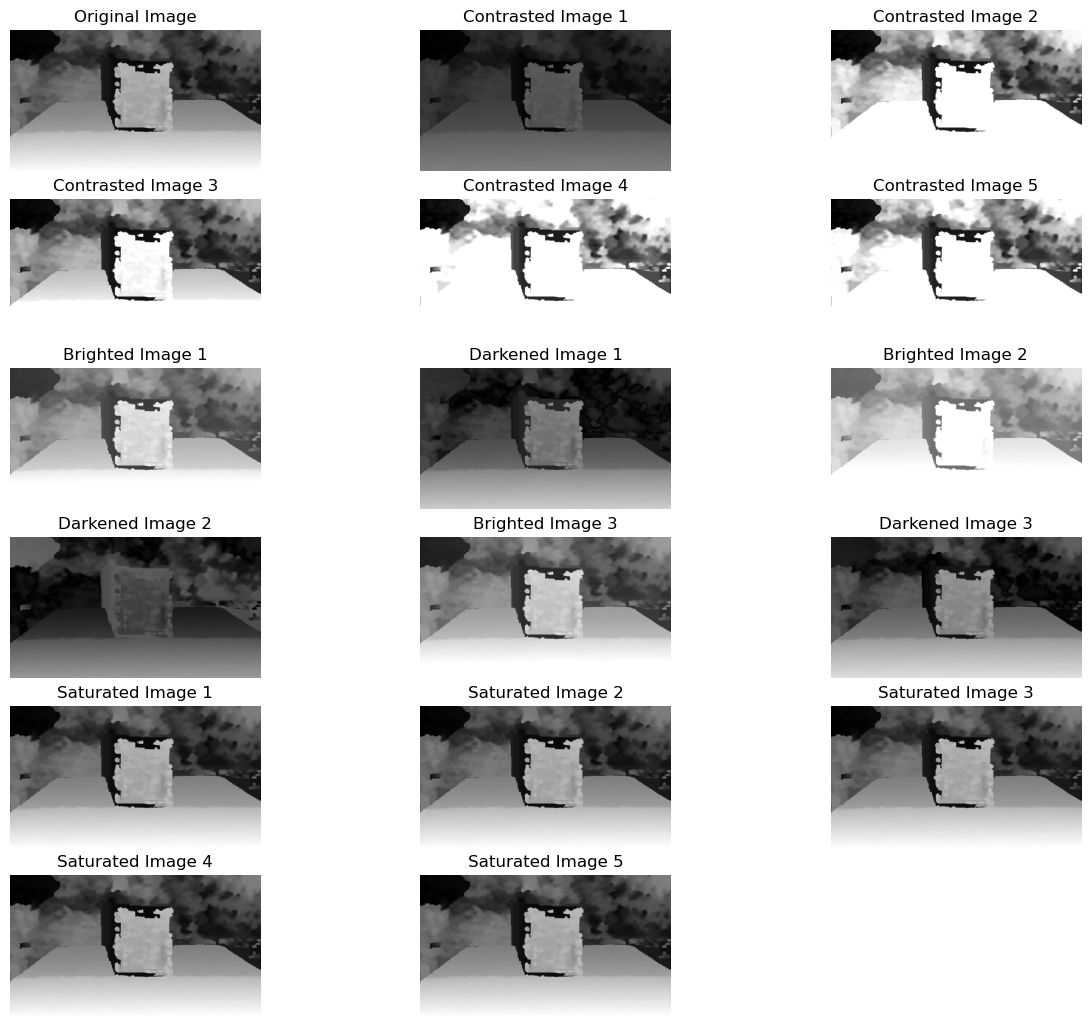

In [24]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15), squeeze=False)
gs = axes[0,0].get_gridspec()

current_image = cv2.imread(imgs_selected_list[3])
plt_size = gs.ncols * gs.nrows

cont_selected_1 = adjust_image_contrast(current_image, 0.5)
cont_selected_2 = adjust_image_contrast(current_image, 2.0)
cont_selected_3 = adjust_image_contrast(current_image, 1.5)
cont_selected_4 = adjust_image_contrast(current_image, 3.0)
cont_selected_5 = adjust_image_contrast(current_image, 2.5)
bright_selected_1 = adjust_image_brightness(current_image, 50)
dark_selected_1 = adjust_image_brightness(current_image, -50)
bright_selected_2 = adjust_image_brightness(current_image, 100)
dark_selected_2 = adjust_image_brightness(current_image, -100)
bright_selected_3 = adjust_image_brightness(current_image, 30)
dark_selected_3 = adjust_image_brightness(current_image, -30)
sat_selected_1 = adjust_image_saturation(current_image, 1.5)
sat_selected_2 = adjust_image_saturation(current_image, 0.5)
sat_selected_3 = adjust_image_saturation(current_image, 1.2)
sat_selected_4 = adjust_image_saturation(current_image, 2.1)
sat_selected_5 = adjust_image_saturation(current_image, 3.5)

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': cont_selected_1,  'title': 'Contrasted Image 1'},
              {'generated_image': cont_selected_2,  'title': 'Contrasted Image 2'},
              {'generated_image': cont_selected_3,  'title': 'Contrasted Image 3'},
              {'generated_image': cont_selected_4,  'title': 'Contrasted Image 4'},
              {'generated_image': cont_selected_5,  'title': 'Contrasted Image 5'},
              {'generated_image': bright_selected_1, 'title': 'Brighted Image 1'},
              {'generated_image': dark_selected_1, 'title': 'Darkened Image 1'},
              {'generated_image': bright_selected_2, 'title': 'Brighted Image 2'},
              {'generated_image': dark_selected_2, 'title': 'Darkened Image 2'},
              {'generated_image': bright_selected_3, 'title': 'Brighted Image 3'},
              {'generated_image': dark_selected_3, 'title': 'Darkened Image 3'},
              {'generated_image': sat_selected_1, 'title': 'Saturated Image 1'},
              {'generated_image': sat_selected_2, 'title': 'Saturated Image 2'},
              {'generated_image': sat_selected_3, 'title': 'Saturated Image 3'},
              {'generated_image': sat_selected_4, 'title': 'Saturated Image 4'},
              {'generated_image': sat_selected_5, 'title': 'Saturated Image 5'}
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[3][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_4_'+str(row)+str(col)+imgs_selected_list[3][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_4_'+str(row)+str(col)+imgs_selected_list[3][-4:], f['generated_image'])


for j in range((5*3)+(1%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

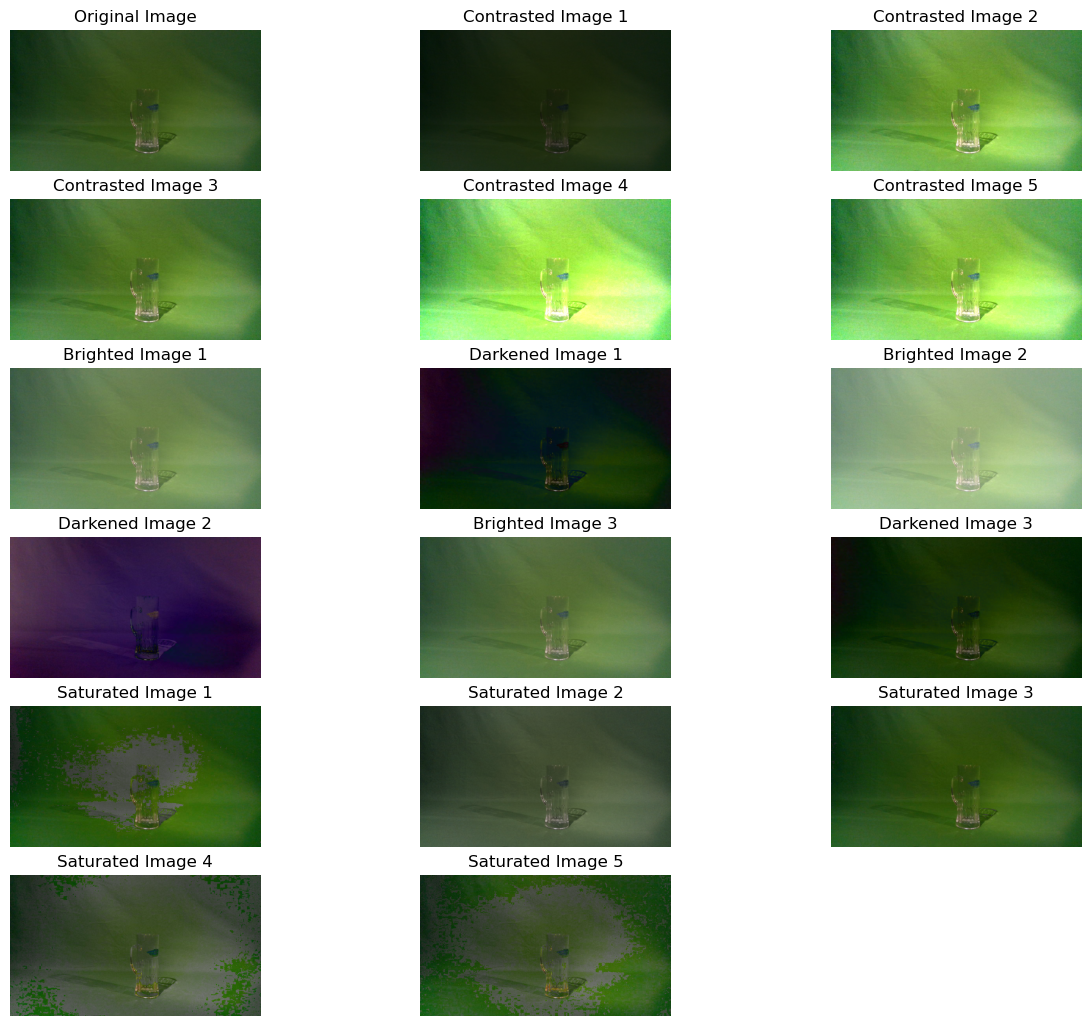

In [25]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 15), squeeze=False)
gs = axes[0,0].get_gridspec()

current_image = cv2.imread(imgs_selected_list[4])
plt_size = gs.ncols * gs.nrows

cont_selected_1 = adjust_image_contrast(current_image, 0.5)
cont_selected_2 = adjust_image_contrast(current_image, 2.0)
cont_selected_3 = adjust_image_contrast(current_image, 1.5)
cont_selected_4 = adjust_image_contrast(current_image, 3.0)
cont_selected_5 = adjust_image_contrast(current_image, 2.5)
bright_selected_1 = adjust_image_brightness(current_image, 50)
dark_selected_1 = adjust_image_brightness(current_image, -50)
bright_selected_2 = adjust_image_brightness(current_image, 100)
dark_selected_2 = adjust_image_brightness(current_image, -100)
bright_selected_3 = adjust_image_brightness(current_image, 30)
dark_selected_3 = adjust_image_brightness(current_image, -30)
sat_selected_1 = adjust_image_saturation(current_image, 1.5)
sat_selected_2 = adjust_image_saturation(current_image, 0.5)
sat_selected_3 = adjust_image_saturation(current_image, 1.2)
sat_selected_4 = adjust_image_saturation(current_image, 2.1)
sat_selected_5 = adjust_image_saturation(current_image, 3.5)

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': cont_selected_1,  'title': 'Contrasted Image 1'},
              {'generated_image': cont_selected_2,  'title': 'Contrasted Image 2'},
              {'generated_image': cont_selected_3,  'title': 'Contrasted Image 3'},
              {'generated_image': cont_selected_4,  'title': 'Contrasted Image 4'},
              {'generated_image': cont_selected_5,  'title': 'Contrasted Image 5'},
              {'generated_image': bright_selected_1, 'title': 'Brighted Image 1'},
              {'generated_image': dark_selected_1, 'title': 'Darkened Image 1'},
              {'generated_image': bright_selected_2, 'title': 'Brighted Image 2'},
              {'generated_image': dark_selected_2, 'title': 'Darkened Image 2'},
              {'generated_image': bright_selected_3, 'title': 'Brighted Image 3'},
              {'generated_image': dark_selected_3, 'title': 'Darkened Image 3'},
              {'generated_image': sat_selected_1, 'title': 'Saturated Image 1'},
              {'generated_image': sat_selected_2, 'title': 'Saturated Image 2'},
              {'generated_image': sat_selected_3, 'title': 'Saturated Image 3'},
              {'generated_image': sat_selected_4, 'title': 'Saturated Image 4'},
              {'generated_image': sat_selected_5, 'title': 'Saturated Image 5'}
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[4][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_5_'+str(row)+str(col)+imgs_selected_list[4][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+photo_dist_dir+'/photo_img_5_'+str(row)+str(col)+imgs_selected_list[4][-4:], f['generated_image'])

for j in range((5*3)+(1%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

# 2. Geometric Distortions

In [26]:
def rotate_image(img, angle):
    rot_img = cv2.rotate(img, angle)
    return rot_img

In [27]:
def rotate_image_2(img, angle, center, scale):
    # Calculate rotation matrix
    rot_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    
    # Apply affine transformation to rotate the image
    rot_image = cv2.warpAffine(img, rot_matrix, (width, height))
    return rot_image

In [28]:
def flip_image(img, flag):
    flipped_img = cv2.flip(img, flag)
    return flipped_img

In [29]:
def flip_image_2(img, matrix, center):
    w = center[0]*2
    h = center[1]*2
    flipped_img = cv2.warpPerspective(img, matrix, (int(w), int(h)))
    return flipped_img

In [30]:
def translate_image(img, matrix, center):
    w = center[0]*2
    h = center[1]*2
    translated_img = cv2.warpAffine(img, matrix, (int(w), int(h)))
    return translated_img

In [31]:
def shear_image(img, matrix, center):
    w = center[0]*2
    h = center[1]*2
    sheared_img = cv2.warpPerspective(img, matrix, (int(w*1.5), int(h*1.5)))
    return sheared_img

In [32]:
def scale_image(img, matrix, center):
    w = center[0]*2
    h = center[1]*2
    sheared_img = cv2.warpPerspective(img, matrix, (int(w), int(h)))
    return sheared_img

In [33]:
#rot_selected = rotate_image(img_selected, cv2.ROTATE_90_CLOCKWISE)
#cv2.imshow('Original Image', img_selected)
#cv2.waitKey(0)
#cv2.imshow('Rotated Image', rot_selected)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [34]:
img_selected.shape

(720, 1280, 3)

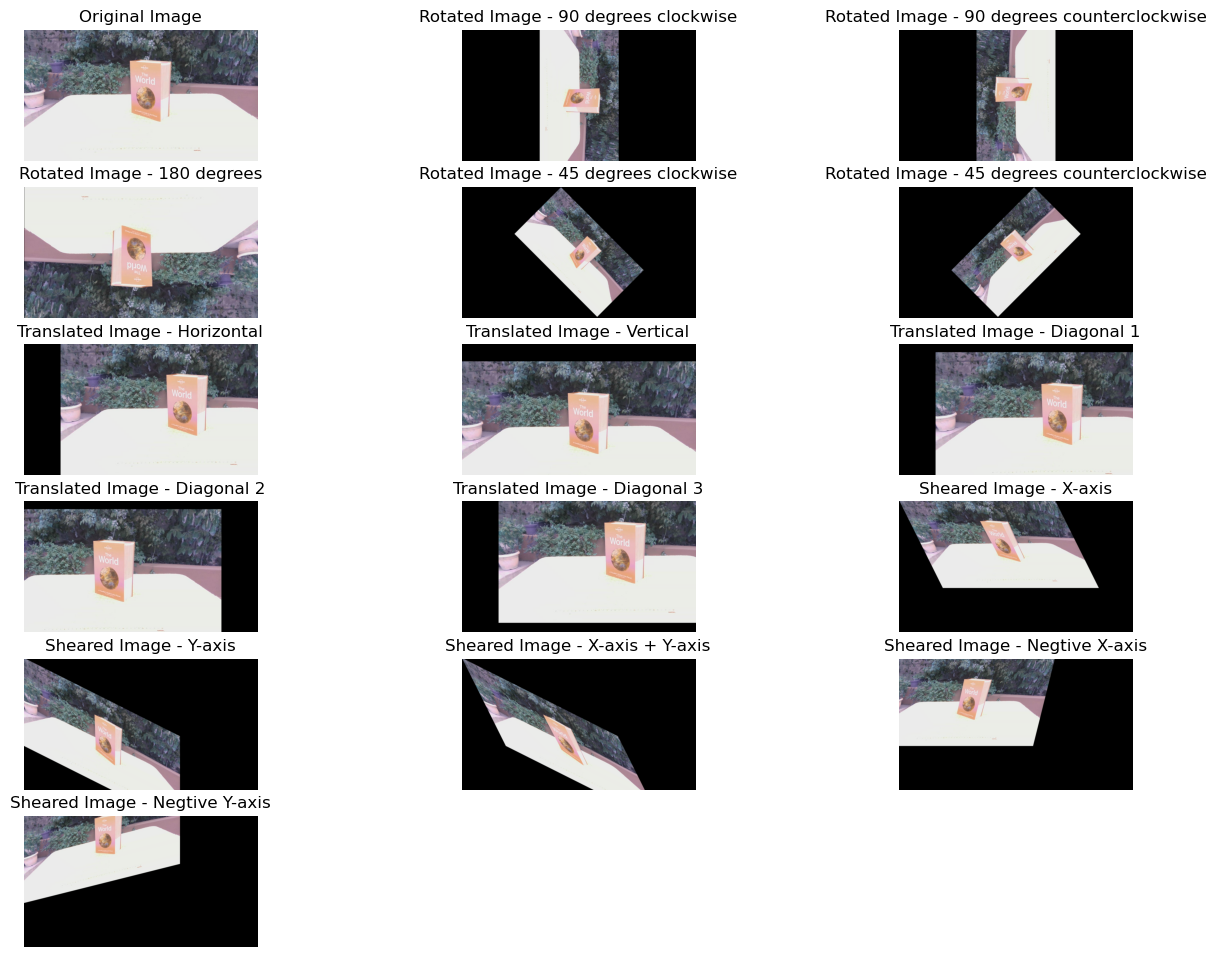

In [35]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 16), squeeze=False)

current_image = cv2.imread(imgs_selected_list[0])

rot_selected_90_c = rotate_image_2(current_image, -90, center, 0.6)
rot_selected_90_cc = rotate_image_2(current_image, 90, center, 0.6)
rot_selected_180 = rotate_image_2(current_image, 180, center, 1)
rot_selected_45_c = rotate_image_2(current_image, -45, center, 0.5)
rot_selected_45_cc = rotate_image_2(current_image, 45, center, 0.5)
trans_selected_hor = translate_image(current_image, np.float32([[1,0,200],[0,1,0]]), center)
trans_selected_ver = translate_image(current_image, np.float32([[1,0,0],[0,1,100]]), center)
trans_selected_diag_1 = translate_image(current_image, np.float32([[1,0,200],[0,1,50]]), center)
trans_selected_diag_2 = translate_image(current_image, np.float32([[1,0,-200],[0,1,50]]), center)
trans_selected_diag_3 = translate_image(current_image, np.float32([[1,0,200],[0,1,-50]]), center)
shear_selected_x = shear_image(current_image, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y = shear_image(current_image, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_y = shear_image(current_image, np.float32([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_neg = shear_image(current_image, np.float32([[1, -0.25, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y_neg = shear_image(current_image, np.float32([[1, 0, 0], [-0.25, 1, 0], [0, 0, 1]]), center)
scale_selected_x = scale_image(current_image, np.float32([[2, 0, 0], [0, 1, 0], [0, 0, 1]]), center)
scale_selected_y = scale_image(current_image, np.float32([[1, 0, 0], [0, 2, 0], [0, 0, 1]]), center)
scale_selected_x_y = scale_image(current_image, np.float32([[2, 0, 0], [0, 2, 0], [0, 0, 1]]), center)

gs = axes[0,0].get_gridspec()
plt_size = gs.ncols * gs.nrows

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': rot_selected_90_c,  'title': 'Rotated Image - 90 degrees clockwise'},
              {'generated_image': rot_selected_90_cc,  'title': 'Rotated Image - 90 degrees counterclockwise'},
              {'generated_image': rot_selected_180,  'title': 'Rotated Image - 180 degrees'},
              {'generated_image': rot_selected_45_c,  'title': 'Rotated Image - 45 degrees clockwise'},
              {'generated_image': rot_selected_45_cc,  'title': 'Rotated Image - 45 degrees counterclockwise'},
              {'generated_image': trans_selected_hor, 'title': 'Translated Image - Horizontal'},
              {'generated_image': trans_selected_ver, 'title': 'Translated Image - Vertical'},
              {'generated_image': trans_selected_diag_1, 'title': 'Translated Image - Diagonal 1'},
              {'generated_image': trans_selected_diag_2, 'title': 'Translated Image - Diagonal 2'},
              {'generated_image': trans_selected_diag_3, 'title': 'Translated Image - Diagonal 3'},
              {'generated_image': shear_selected_x, 'title': 'Sheared Image - X-axis'},
              {'generated_image': shear_selected_y, 'title': 'Sheared Image - Y-axis'},
              {'generated_image': shear_selected_x_y, 'title': 'Sheared Image - X-axis + Y-axis'},
              {'generated_image': shear_selected_x_neg, 'title': 'Sheared Image - Negtive X-axis'},
              {'generated_image': shear_selected_y_neg, 'title': 'Sheared Image - Negtive Y-axis'},
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[0][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_1_'+str(row)+str(col)+imgs_selected_list[0][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_1_'+str(row)+str(col)+imgs_selected_list[0][-4:], f['generated_image'])

for j in range((5*3)+(0%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

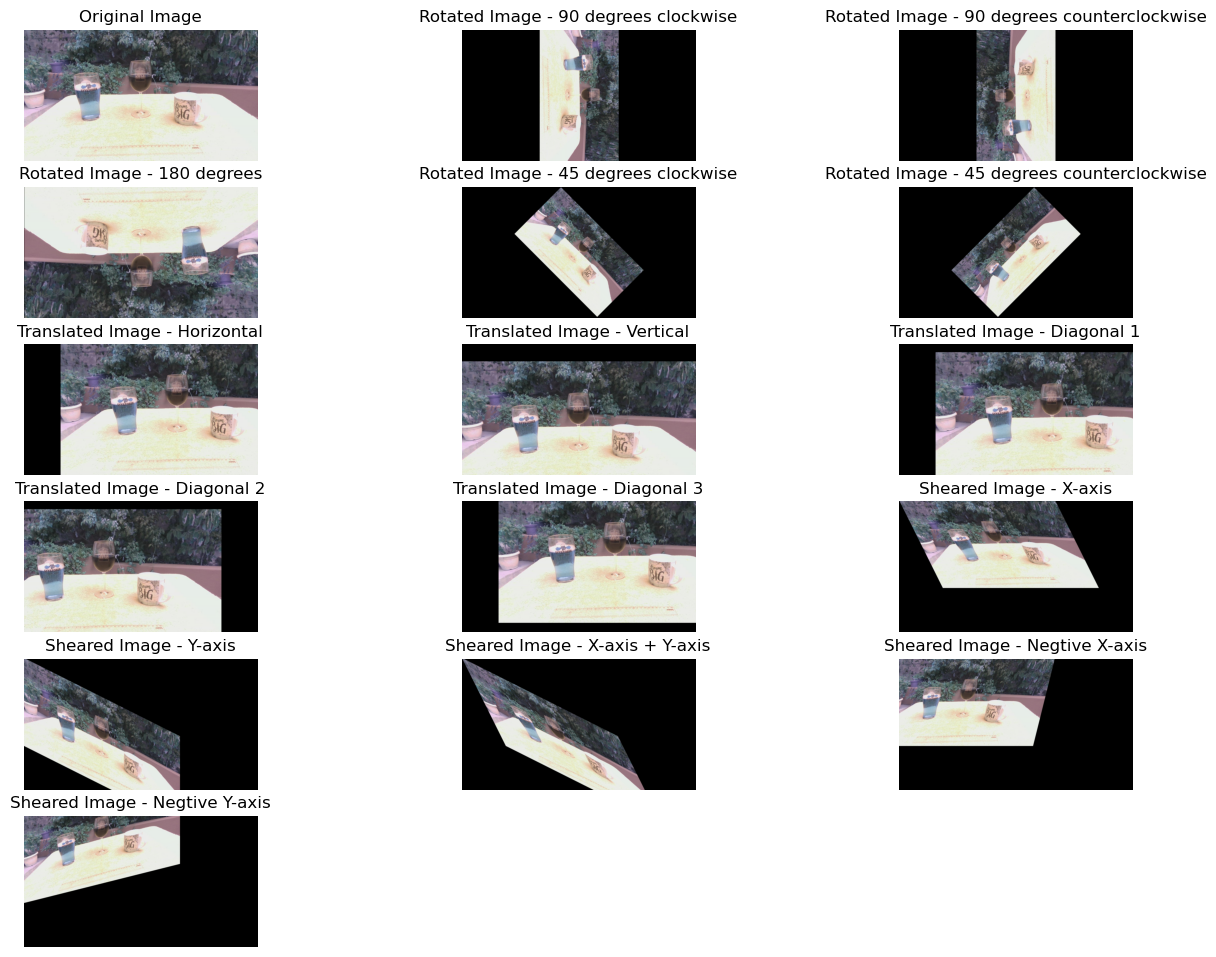

In [36]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 16), squeeze=False)

current_image = cv2.imread(imgs_selected_list[1])

rot_selected_90_c = rotate_image_2(current_image, -90, center, 0.6)
rot_selected_90_cc = rotate_image_2(current_image, 90, center, 0.6)
rot_selected_180 = rotate_image_2(current_image, 180, center, 1)
rot_selected_45_c = rotate_image_2(current_image, -45, center, 0.5)
rot_selected_45_cc = rotate_image_2(current_image, 45, center, 0.5)
trans_selected_hor = translate_image(current_image, np.float32([[1,0,200],[0,1,0]]), center)
trans_selected_ver = translate_image(current_image, np.float32([[1,0,0],[0,1,100]]), center)
trans_selected_diag_1 = translate_image(current_image, np.float32([[1,0,200],[0,1,50]]), center)
trans_selected_diag_2 = translate_image(current_image, np.float32([[1,0,-200],[0,1,50]]), center)
trans_selected_diag_3 = translate_image(current_image, np.float32([[1,0,200],[0,1,-50]]), center)
shear_selected_x = shear_image(current_image, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y = shear_image(current_image, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_y = shear_image(current_image, np.float32([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_neg = shear_image(current_image, np.float32([[1, -0.25, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y_neg = shear_image(current_image, np.float32([[1, 0, 0], [-0.25, 1, 0], [0, 0, 1]]), center)
scale_selected_x = scale_image(current_image, np.float32([[2, 0, 0], [0, 1, 0], [0, 0, 1]]), center)
scale_selected_y = scale_image(current_image, np.float32([[1, 0, 0], [0, 2, 0], [0, 0, 1]]), center)
scale_selected_x_y = scale_image(current_image, np.float32([[2, 0, 0], [0, 2, 0], [0, 0, 1]]), center)

gs = axes[0,0].get_gridspec()
plt_size = gs.ncols * gs.nrows

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': rot_selected_90_c,  'title': 'Rotated Image - 90 degrees clockwise'},
              {'generated_image': rot_selected_90_cc,  'title': 'Rotated Image - 90 degrees counterclockwise'},
              {'generated_image': rot_selected_180,  'title': 'Rotated Image - 180 degrees'},
              {'generated_image': rot_selected_45_c,  'title': 'Rotated Image - 45 degrees clockwise'},
              {'generated_image': rot_selected_45_cc,  'title': 'Rotated Image - 45 degrees counterclockwise'},
              {'generated_image': trans_selected_hor, 'title': 'Translated Image - Horizontal'},
              {'generated_image': trans_selected_ver, 'title': 'Translated Image - Vertical'},
              {'generated_image': trans_selected_diag_1, 'title': 'Translated Image - Diagonal 1'},
              {'generated_image': trans_selected_diag_2, 'title': 'Translated Image - Diagonal 2'},
              {'generated_image': trans_selected_diag_3, 'title': 'Translated Image - Diagonal 3'},
              {'generated_image': shear_selected_x, 'title': 'Sheared Image - X-axis'},
              {'generated_image': shear_selected_y, 'title': 'Sheared Image - Y-axis'},
              {'generated_image': shear_selected_x_y, 'title': 'Sheared Image - X-axis + Y-axis'},
              {'generated_image': shear_selected_x_neg, 'title': 'Sheared Image - Negtive X-axis'},
              {'generated_image': shear_selected_y_neg, 'title': 'Sheared Image - Negtive Y-axis'},
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[1][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_2_'+str(row)+str(col)+imgs_selected_list[1][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_2_'+str(row)+str(col)+imgs_selected_list[1][-4:], f['generated_image'])

for j in range((5*3)+(0%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

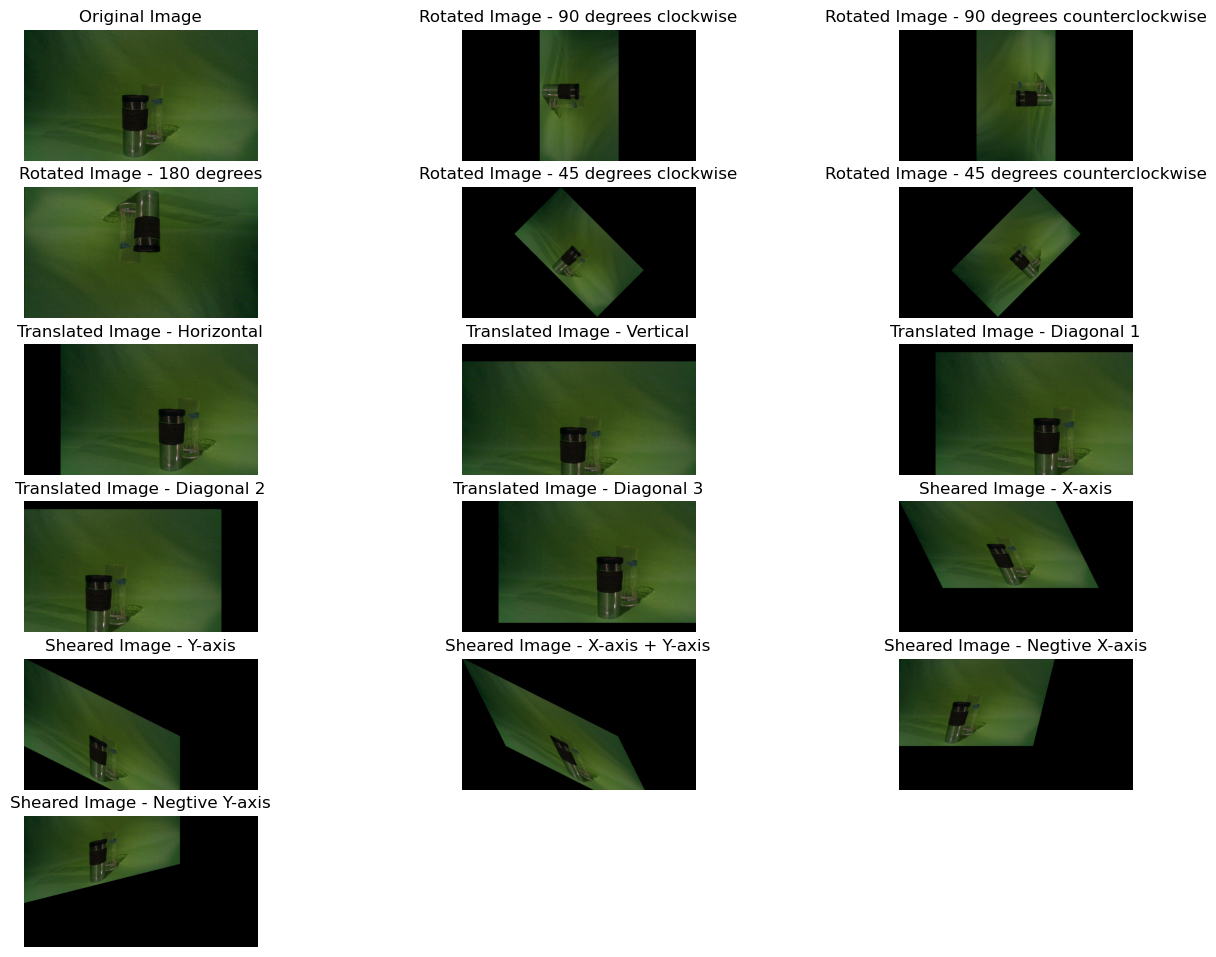

In [37]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 16), squeeze=False)

current_image = cv2.imread(imgs_selected_list[2])

rot_selected_90_c = rotate_image_2(current_image, -90, center, 0.6)
rot_selected_90_cc = rotate_image_2(current_image, 90, center, 0.6)
rot_selected_180 = rotate_image_2(current_image, 180, center, 1)
rot_selected_45_c = rotate_image_2(current_image, -45, center, 0.5)
rot_selected_45_cc = rotate_image_2(current_image, 45, center, 0.5)
trans_selected_hor = translate_image(current_image, np.float32([[1,0,200],[0,1,0]]), center)
trans_selected_ver = translate_image(current_image, np.float32([[1,0,0],[0,1,100]]), center)
trans_selected_diag_1 = translate_image(current_image, np.float32([[1,0,200],[0,1,50]]), center)
trans_selected_diag_2 = translate_image(current_image, np.float32([[1,0,-200],[0,1,50]]), center)
trans_selected_diag_3 = translate_image(current_image, np.float32([[1,0,200],[0,1,-50]]), center)
shear_selected_x = shear_image(current_image, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y = shear_image(current_image, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_y = shear_image(current_image, np.float32([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_neg = shear_image(current_image, np.float32([[1, -0.25, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y_neg = shear_image(current_image, np.float32([[1, 0, 0], [-0.25, 1, 0], [0, 0, 1]]), center)
scale_selected_x = scale_image(current_image, np.float32([[2, 0, 0], [0, 1, 0], [0, 0, 1]]), center)
scale_selected_y = scale_image(current_image, np.float32([[1, 0, 0], [0, 2, 0], [0, 0, 1]]), center)
scale_selected_x_y = scale_image(current_image, np.float32([[2, 0, 0], [0, 2, 0], [0, 0, 1]]), center)

gs = axes[0,0].get_gridspec()
plt_size = gs.ncols * gs.nrows

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': rot_selected_90_c,  'title': 'Rotated Image - 90 degrees clockwise'},
              {'generated_image': rot_selected_90_cc,  'title': 'Rotated Image - 90 degrees counterclockwise'},
              {'generated_image': rot_selected_180,  'title': 'Rotated Image - 180 degrees'},
              {'generated_image': rot_selected_45_c,  'title': 'Rotated Image - 45 degrees clockwise'},
              {'generated_image': rot_selected_45_cc,  'title': 'Rotated Image - 45 degrees counterclockwise'},
              {'generated_image': trans_selected_hor, 'title': 'Translated Image - Horizontal'},
              {'generated_image': trans_selected_ver, 'title': 'Translated Image - Vertical'},
              {'generated_image': trans_selected_diag_1, 'title': 'Translated Image - Diagonal 1'},
              {'generated_image': trans_selected_diag_2, 'title': 'Translated Image - Diagonal 2'},
              {'generated_image': trans_selected_diag_3, 'title': 'Translated Image - Diagonal 3'},
              {'generated_image': shear_selected_x, 'title': 'Sheared Image - X-axis'},
              {'generated_image': shear_selected_y, 'title': 'Sheared Image - Y-axis'},
              {'generated_image': shear_selected_x_y, 'title': 'Sheared Image - X-axis + Y-axis'},
              {'generated_image': shear_selected_x_neg, 'title': 'Sheared Image - Negtive X-axis'},
              {'generated_image': shear_selected_y_neg, 'title': 'Sheared Image - Negtive Y-axis'},
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[2][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_3_'+str(row)+str(col)+imgs_selected_list[2][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_3_'+str(row)+str(col)+imgs_selected_list[2][-4:], f['generated_image'])

for j in range((5*3)+(0%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

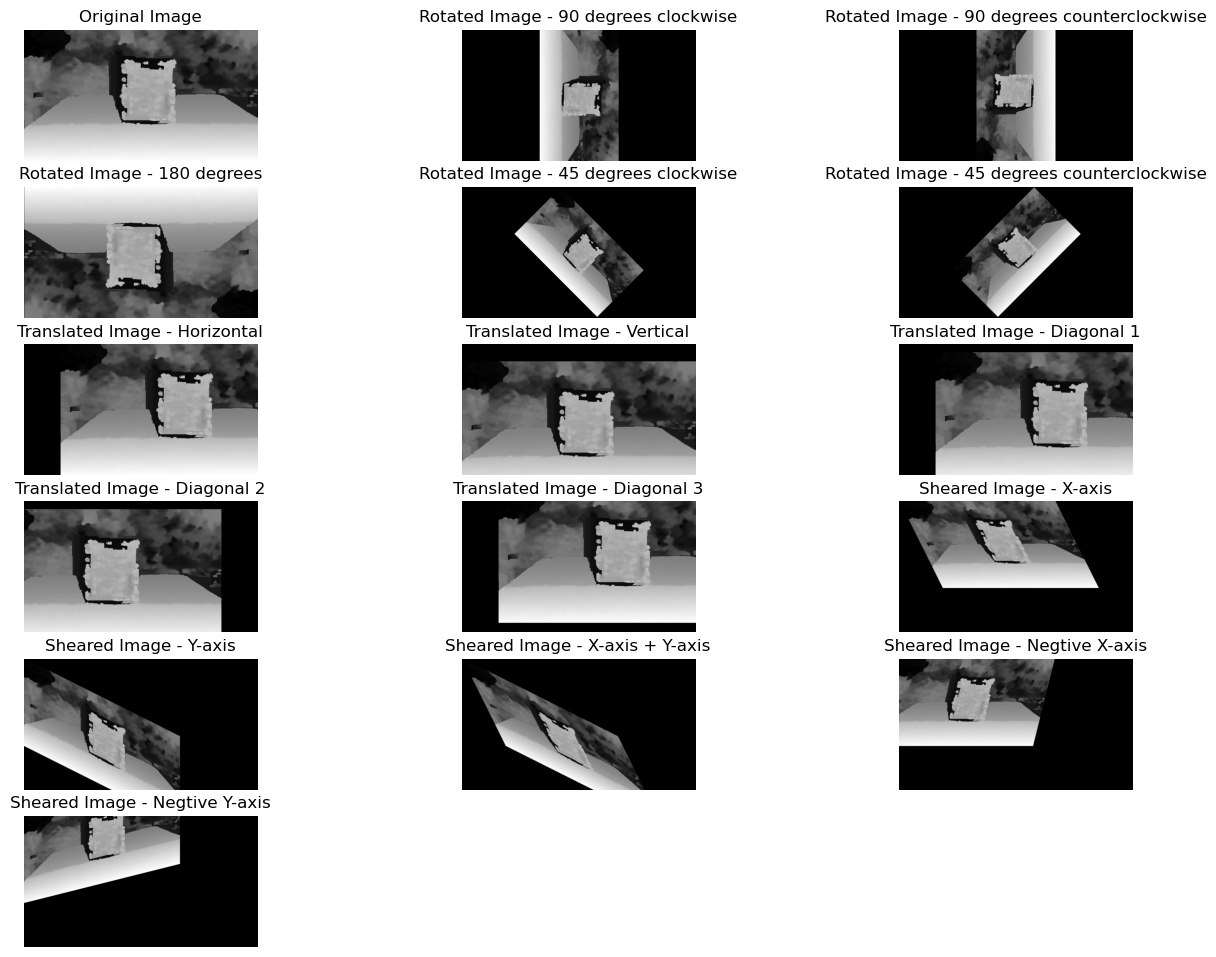

In [38]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 16), squeeze=False)

current_image = cv2.imread(imgs_selected_list[3])

rot_selected_90_c = rotate_image_2(current_image, -90, center, 0.6)
rot_selected_90_cc = rotate_image_2(current_image, 90, center, 0.6)
rot_selected_180 = rotate_image_2(current_image, 180, center, 1)
rot_selected_45_c = rotate_image_2(current_image, -45, center, 0.5)
rot_selected_45_cc = rotate_image_2(current_image, 45, center, 0.5)
trans_selected_hor = translate_image(current_image, np.float32([[1,0,200],[0,1,0]]), center)
trans_selected_ver = translate_image(current_image, np.float32([[1,0,0],[0,1,100]]), center)
trans_selected_diag_1 = translate_image(current_image, np.float32([[1,0,200],[0,1,50]]), center)
trans_selected_diag_2 = translate_image(current_image, np.float32([[1,0,-200],[0,1,50]]), center)
trans_selected_diag_3 = translate_image(current_image, np.float32([[1,0,200],[0,1,-50]]), center)
shear_selected_x = shear_image(current_image, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y = shear_image(current_image, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_y = shear_image(current_image, np.float32([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_neg = shear_image(current_image, np.float32([[1, -0.25, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y_neg = shear_image(current_image, np.float32([[1, 0, 0], [-0.25, 1, 0], [0, 0, 1]]), center)
scale_selected_x = scale_image(current_image, np.float32([[2, 0, 0], [0, 1, 0], [0, 0, 1]]), center)
scale_selected_y = scale_image(current_image, np.float32([[1, 0, 0], [0, 2, 0], [0, 0, 1]]), center)
scale_selected_x_y = scale_image(current_image, np.float32([[2, 0, 0], [0, 2, 0], [0, 0, 1]]), center)

gs = axes[0,0].get_gridspec()
plt_size = gs.ncols * gs.nrows

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': rot_selected_90_c,  'title': 'Rotated Image - 90 degrees clockwise'},
              {'generated_image': rot_selected_90_cc,  'title': 'Rotated Image - 90 degrees counterclockwise'},
              {'generated_image': rot_selected_180,  'title': 'Rotated Image - 180 degrees'},
              {'generated_image': rot_selected_45_c,  'title': 'Rotated Image - 45 degrees clockwise'},
              {'generated_image': rot_selected_45_cc,  'title': 'Rotated Image - 45 degrees counterclockwise'},
              {'generated_image': trans_selected_hor, 'title': 'Translated Image - Horizontal'},
              {'generated_image': trans_selected_ver, 'title': 'Translated Image - Vertical'},
              {'generated_image': trans_selected_diag_1, 'title': 'Translated Image - Diagonal 1'},
              {'generated_image': trans_selected_diag_2, 'title': 'Translated Image - Diagonal 2'},
              {'generated_image': trans_selected_diag_3, 'title': 'Translated Image - Diagonal 3'},
              {'generated_image': shear_selected_x, 'title': 'Sheared Image - X-axis'},
              {'generated_image': shear_selected_y, 'title': 'Sheared Image - Y-axis'},
              {'generated_image': shear_selected_x_y, 'title': 'Sheared Image - X-axis + Y-axis'},
              {'generated_image': shear_selected_x_neg, 'title': 'Sheared Image - Negtive X-axis'},
              {'generated_image': shear_selected_y_neg, 'title': 'Sheared Image - Negtive Y-axis'},
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[3][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_4_'+str(row)+str(col)+imgs_selected_list[3][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_4_'+str(row)+str(col)+imgs_selected_list[3][-4:], f['generated_image'])

for j in range((5*3)+(0%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)

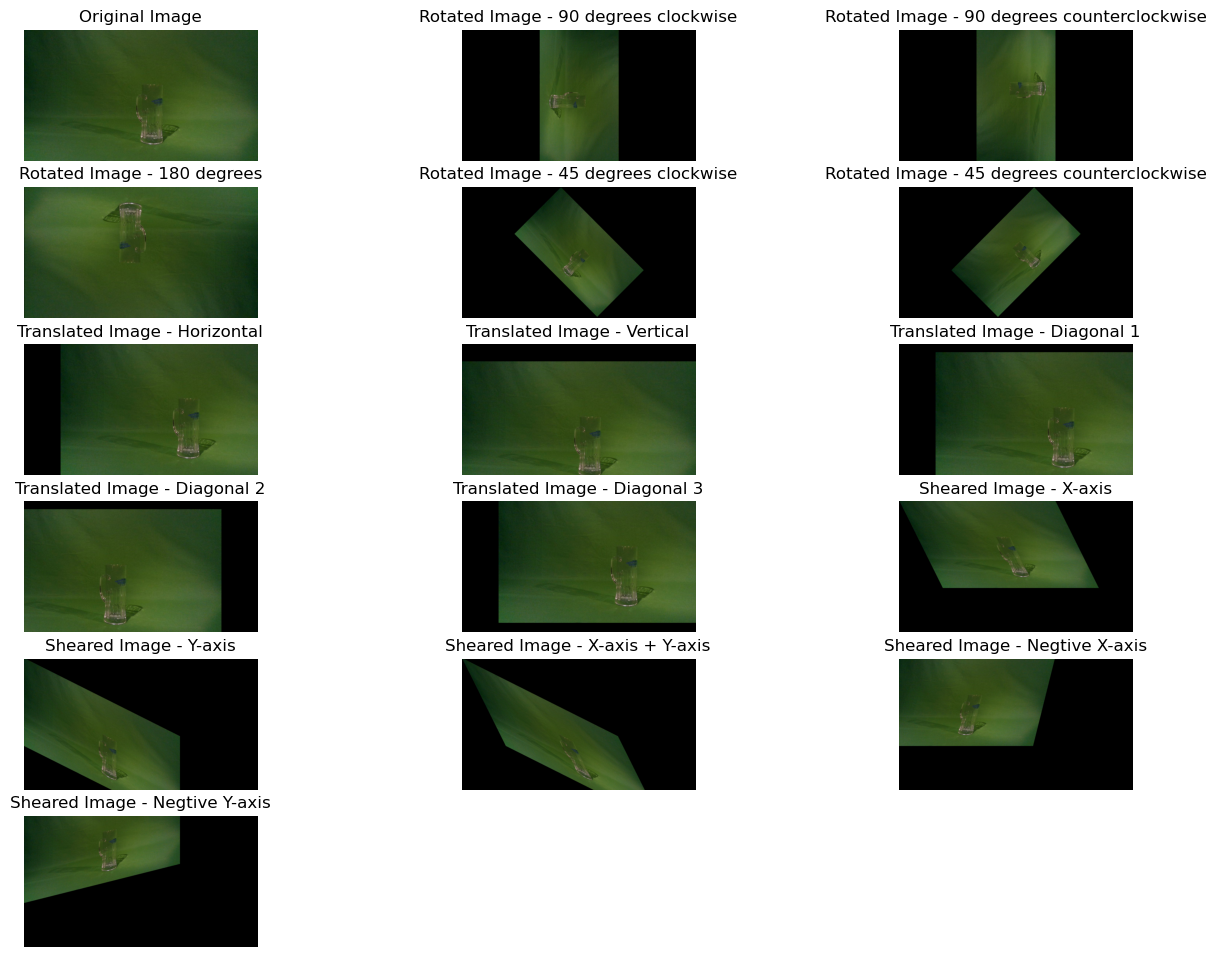

In [39]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16, 16), squeeze=False)

current_image = cv2.imread(imgs_selected_list[4])

rot_selected_90_c = rotate_image_2(current_image, -90, center, 0.6)
rot_selected_90_cc = rotate_image_2(current_image, 90, center, 0.6)
rot_selected_180 = rotate_image_2(current_image, 180, center, 1)
rot_selected_45_c = rotate_image_2(current_image, -45, center, 0.5)
rot_selected_45_cc = rotate_image_2(current_image, 45, center, 0.5)
trans_selected_hor = translate_image(current_image, np.float32([[1,0,200],[0,1,0]]), center)
trans_selected_ver = translate_image(current_image, np.float32([[1,0,0],[0,1,100]]), center)
trans_selected_diag_1 = translate_image(current_image, np.float32([[1,0,200],[0,1,50]]), center)
trans_selected_diag_2 = translate_image(current_image, np.float32([[1,0,-200],[0,1,50]]), center)
trans_selected_diag_3 = translate_image(current_image, np.float32([[1,0,200],[0,1,-50]]), center)
shear_selected_x = shear_image(current_image, np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y = shear_image(current_image, np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_y = shear_image(current_image, np.float32([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]]), center)
shear_selected_x_neg = shear_image(current_image, np.float32([[1, -0.25, 0], [0, 1, 0], [0, 0, 1]]), center)
shear_selected_y_neg = shear_image(current_image, np.float32([[1, 0, 0], [-0.25, 1, 0], [0, 0, 1]]), center)
scale_selected_x = scale_image(current_image, np.float32([[2, 0, 0], [0, 1, 0], [0, 0, 1]]), center)
scale_selected_y = scale_image(current_image, np.float32([[1, 0, 0], [0, 2, 0], [0, 0, 1]]), center)
scale_selected_x_y = scale_image(current_image, np.float32([[2, 0, 0], [0, 2, 0], [0, 0, 1]]), center)

gs = axes[0,0].get_gridspec()
plt_size = gs.ncols * gs.nrows

aug_images = [{'generated_image': current_image, 'title': 'Original Image'},
              {'generated_image': rot_selected_90_c,  'title': 'Rotated Image - 90 degrees clockwise'},
              {'generated_image': rot_selected_90_cc,  'title': 'Rotated Image - 90 degrees counterclockwise'},
              {'generated_image': rot_selected_180,  'title': 'Rotated Image - 180 degrees'},
              {'generated_image': rot_selected_45_c,  'title': 'Rotated Image - 45 degrees clockwise'},
              {'generated_image': rot_selected_45_cc,  'title': 'Rotated Image - 45 degrees counterclockwise'},
              {'generated_image': trans_selected_hor, 'title': 'Translated Image - Horizontal'},
              {'generated_image': trans_selected_ver, 'title': 'Translated Image - Vertical'},
              {'generated_image': trans_selected_diag_1, 'title': 'Translated Image - Diagonal 1'},
              {'generated_image': trans_selected_diag_2, 'title': 'Translated Image - Diagonal 2'},
              {'generated_image': trans_selected_diag_3, 'title': 'Translated Image - Diagonal 3'},
              {'generated_image': shear_selected_x, 'title': 'Sheared Image - X-axis'},
              {'generated_image': shear_selected_y, 'title': 'Sheared Image - Y-axis'},
              {'generated_image': shear_selected_x_y, 'title': 'Sheared Image - X-axis + Y-axis'},
              {'generated_image': shear_selected_x_neg, 'title': 'Sheared Image - Negtive X-axis'},
              {'generated_image': shear_selected_y_neg, 'title': 'Sheared Image - Negtive Y-axis'},
             ]

for i, f in enumerate(aug_images):
    row = (i) // gs.ncols
    col = (i) % gs.ncols
    axes[row, col].imshow(f['generated_image'], cmap='gray')
    axes[row, col].set_title(f['title'])
    axes[row, col].axis('off')
    if f['title'] != 'Original Image':
        if imgs_selected_list[4][-5:] == ".jpeg":
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_5_'+str(row)+str(col)+imgs_selected_list[4][-5:], f['generated_image'])
        else:
            cv2.imwrite(saved_imgs_dir+'/'+geo_dist_dir+'/photo_img_5_'+str(row)+str(col)+imgs_selected_list[4][-4:], f['generated_image'])

for j in range((5*3)+(0%3), plt_size-1):
    #print(j)
    row = (j+1) // gs.ncols
    col = (j+1) % gs.ncols
    axes[row, col].set_visible(False)